## %%writefile test
## Homework 1
1. Perform <b>Adaptive Background Subtraction</b>. i.e., <i>S(t)=abs(I(t)-B(t))</i> where <i>B(t)</i> is the adaptive background image.
2. Perform <b>Foreground Detection</b>. i.e., <i>F(t)=I(t) if S(t) > Threshold</i>
3. Show the captured image <i>I(t)</i>, the adaptive background image <i>B(t)</i>, the subtracted image <i>S(t)</i>, and the foreground image <i>F(t)</i>.
4. Adjust the alpha value and observe the result.
5. Any idea on how to generate a better Adaptive Background Image? Try it and compare the results.
6. Write down your observation and comparison at the end of your code by adding an individual cell in Jupyter.
7. Upload your Jupyter code file (*.ipynb)
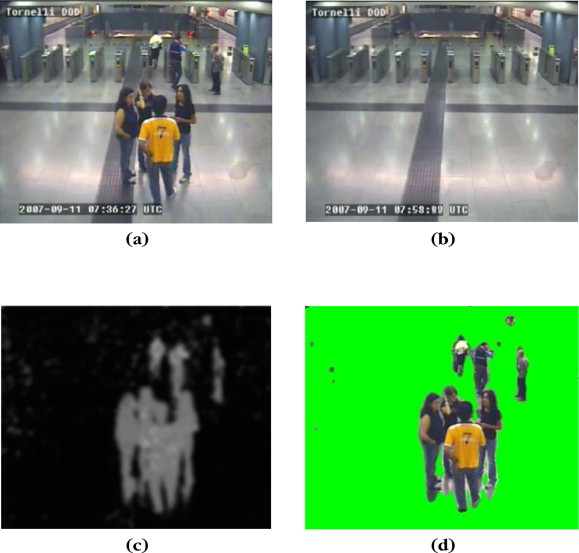

In [1]:
import cv2
import numpy as np
import time
alpha = 0.90
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
ret, frame = cap.read()
fore_img = cur_frame = mhi_frame = cv2.resize(frame, None, fx=0.75, fy=0.75, interpolation=cv2.INTER_AREA)

while True:
    ret, frame = cap.read()
    
    # captured image I(t)
    cur_frame = cv2.resize(frame, None, fx=0.75, fy=0.75, interpolation=cv2.INTER_AREA)
    cur_gray = cv2.cvtColor(cur_frame,cv2.COLOR_BGR2GRAY)
    cv2.imshow('captured image I(t)',cur_frame)
    
    # adaptive background image B(t)
    time.sleep(1)                                                                # 透過延遲1秒讓我能方便擷取執行畫面
    mhi_frame = cv2.addWeighted(mhi_frame, alpha, cur_frame, 1-alpha, 0)         # 將當前畫面已10%的方式更新成背景畫面
    cv2.imshow('Adaptive Background B(t)', mhi_frame)
    
    # subtracted image S(t)
    if mhi_frame is not None:
        sub_frame = cv2.absdiff(cur_frame , mhi_frame)                           # S(t)=abs(I(t)-B(t))
        sub_gray = cv2.cvtColor(sub_frame,cv2.COLOR_BGR2GRAY)                    # 將 subtracted image S(t) 轉換成灰階影像
        (T, sub_gray) = cv2.threshold(sub_gray, 10, 150, cv2.THRESH_BINARY)      # 透過2值化將相減後小於數值10的像素點設定全黑
        
        # 使用 dilate(膨脹)、erode(侵蝕) 讓 subtracted image S(t)有更好的效果
        kernel = np.ones((3,3), np.uint8)
        sub_gray = cv2.dilate(sub_gray, kernel, iterations=1)
        #sub_gray = cv2.erode(sub_gray, kernel, iterations=1)
        cv2.imshow('subtracted image S(t)', sub_gray)
    
    # foreground image F(t)
    fore_img = np.copy(cur_frame)                             # 複製當前畫面影像
    color = [0,255,0]                                         # 設定 背景 顏色
    for i in range(3):                                        # 分別對 B G R 三個通道進行處理
        fore_img[:,:,i][sub_gray[:,:] < 5] = color[i]         # [sub_gray[:,:] < 5] :判斷在 subtracted image S(t)畫面中是否為黑色(像素值<5)
    cv2.imshow('foreground image F(t)', fore_img)
    c = cv2.waitKey(1)
    if c == 27:
        break
cap.release()
cv2.destroyAllWindows()

### Adjust the alpha value and observe the result:
how to generate a better Adaptive Background Image?
> 1. 如果alpha過高的話，當畫面中的物體離開時，不容易恢復到原本的背景影像，導致foreground image F(t)會出現過多的背景畫面。

> 2. 適當的alpha(下圖為0.9的執行成果)能有效率的更新adaptive background image B(t)，讓foreground image F(t)畫面中只出現會新加入或移動的物體影像。

### else:
> 1. 最一開始在未經過threshold(二值化)、dilate(膨脹)、erode(侵蝕)等函式處理時，在foreground image F(t)會出現新增到畫面中的物體中有需多綠色點，發現原因是在subtracted image S(t)中畫面沒有切割乾淨導致，透過上述函式能有效的解決!

### 執行成果圖

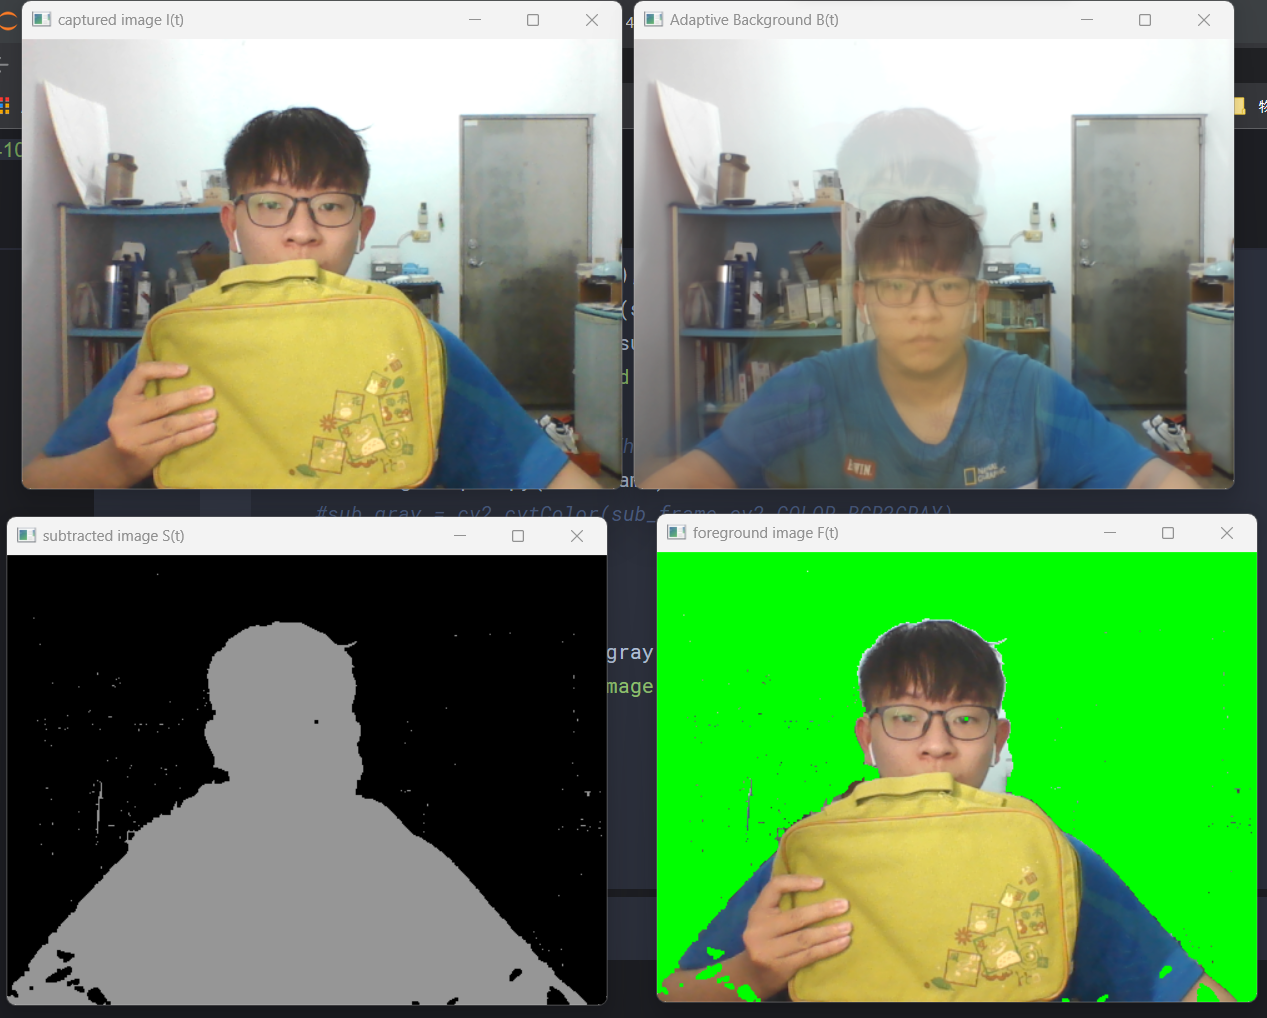